<a href="https://colab.research.google.com/github/SarAbdulaziz/Test/blob/main/Copy_of_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load the Data

In [76]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Trainees - المتدربين/Week 4/4- Deep learning/1-Weekly Task/Night/Datasets/Traffic_Accidents.csv')

In [4]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


In [6]:
df.shape

(52000, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [8]:
df.sample(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
16086,40090,200506B023622,386380.0,396290.0,-2.206622,53.463167,6,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01005239,2005.0
39554,97037,200530B000566,429820.0,359980.0,-1.555718,53.136130,30,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Other,Wet/Damp,1.0,Yes,E01019623,2005.0
2938,9781,200501KG70454,543800.0,184130.0,0.072050,51.537708,1,3,2.0,1,...,124.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01000008,2005.0
12486,42285,200506G034112,395650.0,398080.0,-2.067020,53.479416,6,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,E01006023,2005.0
47194,104877,200532D058005,483770.0,390420.0,-0.741419,53.403949,32,2,2.0,2,...,1433.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01026385,2005.0


In [9]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [47]:
df.dropna(inplace=True)

In [45]:
stats.zscore(df)

TypeError: can only concatenate str (not "float") to str

In [46]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [79]:
num = df.select_dtypes(include=[np.number]).columns.tolist()
df_ = df[num]
td =  StandardScaler().fit_transform(df_)

In [80]:
pca = PCA(n_components=0.9)
pca_ = pca.fit_transform(td)
pca_.shape[1]

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [70]:
df['Accident_Index'].unique()
df['Accident_Index'].count_values()

AttributeError: 'Series' object has no attribute 'count_values'

In [13]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [77]:
# The primary goal is to analyze the accidents based on their geographical location.
# we need gographical location and accidents only
df.drop(['Police_Force','Year', 'Light_Conditions','Date','Time','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Number_of_Vehicles','Unnamed: 0','Weather_Conditions','Speed_limit', 'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties','Urban_or_Rural_Area', 'Road_Surface_Conditions'], axis=1, inplace=True)

In [78]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,LSOA_of_Accident_Location
0,2.01E+12,381880.0,298700.0,-2.268891,52.585773,3,1.0,254.0,E10000028,5.0,169.0,Single carriageway,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,E01029654
1,200520D303703,413520.0,284740.0,-1.802453,52.460412,2,7.0,300.0,E08000025,3.0,45.0,Slip road,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,E01009313
2,200501TX20137,516260.0,177370.0,-0.327073,51.483290,3,7.0,25.0,E09000018,3.0,4.0,Dual carriageway,4.0,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,E01002678
3,200520E097001,401530.0,282610.0,-1.978930,52.441426,3,5.0,300.0,E08000025,4.0,4121.0,Dual carriageway,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,E01008924
4,2.01E+12,421760.0,320680.0,-1.678823,52.783240,3,3.0,251.0,E10000028,3.0,38.0,Dual carriageway,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,E01029416


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [71]:
sns.relplot(x="Longitude", y="Latitude", hue="Accident_Index",sizes=(40, 200), alpha=.5, palette="muted",height=6, data=df)

Error in callback <function flush_figures at 0x7819bc37c670> (for post_execute):


KeyboardInterrupt: 

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

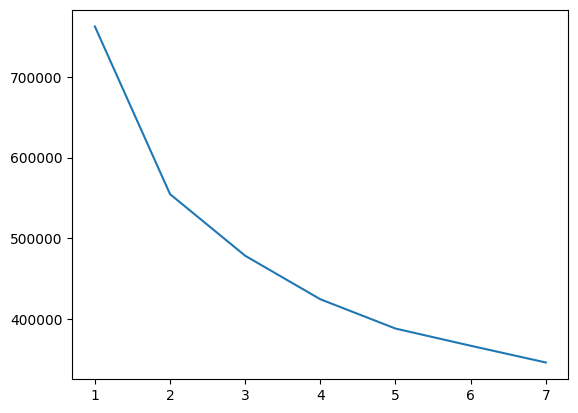

In [68]:
inertia = []
for n in range(1, 8):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(pca_)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 8), inertia)
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [59]:
numofclu = 3
kmeans = KMeans(n_clusters=numofclu, random_state=42)
clusters = kmeans.fit_predict(pca_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Plot the data points with their predicted cluster center

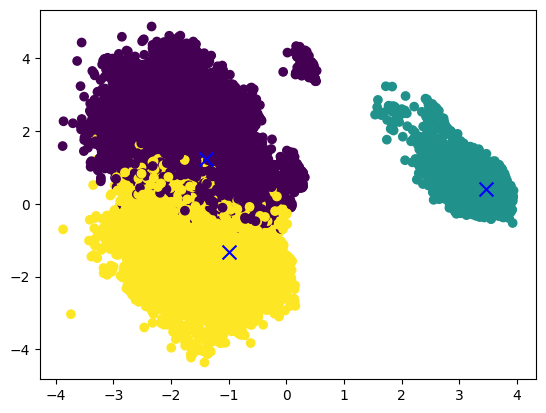

In [67]:
plt.scatter(pca_[:, 0], pca_[:, 1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=100, marker='x')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Justify Your Feature Selection:
-
Number of Clusters Choices:
- based on elbow graph we have, it shows the optimal number at 3.
Evaluation:
- k-means, because it shows the mean of points so it it sutible when doing evalouation for clustring.
- as shown above, it helps me to see if the clustring done is approprtie.
Improvements and Recommendations
- wallah i want to let you know but my brain stopped.
